In [1]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [2]:
from google.colab import auth
auth.authenticate_user()

In [3]:
## Set The Path ##
%cd '/content/mydrive/MyDrive/MRI_Missing_Modality'

/content/mydrive/MyDrive/MRI_Missing_Modality


In [4]:
!pip install pyradiomics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 48.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Discarding https://files.pythonhosted.org/packages/03/c1/20fc2c50ab1e3304da36d866042a1905a2b05a1431ece35448ab6b4578f2/pyradiomics-3.1.0.tar.gz (from https://pypi.org/simple/pyradiomics/): Requested pyradiomics from https://files.pythonhosted.org/packages/03/c1/20fc2c50ab1e3304da36d866042a1905a2b05a1431ece35448ab6b4578f2/pyradiomics-3.1.0.tar.gz has inconsistent version: expected '3.1.0', but metadata has '3.0.1a1'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 54.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 105.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11

In [5]:
import torch, numpy as np
import cv2, os, h5py, torch

# import SimpleITK as sitk
import numpy as np, os, pandas as pd, cv2
# from radiomics import featureextractor
from skimage.measure import regionprops, shannon_entropy
from scipy.stats import kurtosis, entropy
from skimage.feature import hog

> # **Read data**

In [ ]:
!pip install pydicom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 23.9 MB/s eta 0:00:00


In [ ]:
import pydicom, os, cv2
import numpy as np
from PIL import Image

def read_files(path, img_size=(128,128)):
     if os.path.isfile(path):
          file = pydicom.dcmread(path)
          file = file.pixel_array
          print("shape:",file.shape, "-  min value:",np.min(file), "- max value:", np.max(file))
          pixel_data = (np.maximum(file, 0) / file.max()) * 255  # Scale to 0-255
          pixel_data = np.uint8(pixel_data)
          return pixel_data

     if os.path.isdir(path):
          data = os.listdir(path)
          ims = []
          for i in data:
               file = pydicom.dcmread(f"{path}/{i}")
               file = file.pixel_array
               pixel_data = (np.maximum(file, 0) / file.max()) * 255  # Scale to 0-255
               pixel_data = np.uint8(pixel_data)
               pixel_data = cv2.resize(pixel_data, img_size)
               ims.append(pixel_data)

          return ims

In [ ]:
ROOT = '/content/mydrive/MyDrive/MRI_Missing_Modality/TCIA/HGG'
patients = os.listdir(ROOT)

flair_dataset = []
t1_dataset = []
names = []
dates = []

for p in patients:
    sub_path = f"{ROOT}/{p}"
    sub_path2 = f"{sub_path}/{os.listdir(sub_path)[0]}/TCGA-GBM"

    X = os.listdir(sub_path2)[1]
    sub_path3 = f"{sub_path2}/{X}"

    if not os.path.isdir(sub_path3):
      X = os.listdir(sub_path2)[0]
      sub_path3 = f"{sub_path2}/{X}"


    data = os.listdir(sub_path3)[-1]

    print(data, X, '\n')
    main_p = f"{sub_path3}/{data}"

    names.append(X)
    dates.append(data.split('-')[:3])

    flair_images = []
    t1_images = []

    for t in os.listdir(main_p):
        l_folder = f"{main_p}/{t}"

        if 'FLAIR' in t:
            flair_data = read_files(l_folder, (128,128))
            # flair_dataset.append(flair_data)
            flair_images.append(np.array(flair_data))
            print('flair images added', np.array(flair_data).shape)

        elif 'T1' in t:
            t1_data = read_files(l_folder, (128,128))
            # t1_dataset.append(t1_data)
            t1_images.append(np.array(t1_data))
            print('T1 images added', np.array(t1_data).shape)



    flair_dataset.append(flair_images)
    t1_dataset.append(t1_images)

12-15-1998-NA-MRI BRAIN WWO CONTR-70492 TCGA-02-0047 

flair images added (23, 128, 128)
T1 images added (23, 128, 128)
08-18-1999-NA-NA-12458 TCGA-06-0125 

flair images added (59, 128, 128)
T1 images added (59, 128, 128)
03-14-2000-NA-NA-56870 TCGA-06-0129 

flair images added (59, 128, 128)
T1 images added (59, 128, 128)
06-18-2002-NA-NA-52263 TCGA-06-0130 

T1 images added (38, 128, 128)
flair images added (75, 128, 128)
06-25-2004-NA-NA-73941 TCGA-06-0139 

flair images added (37, 128, 128)
T1 images added (37, 128, 128)
09-12-1998-NA-NA-11907 TCGA-06-0141 

flair images added (53, 128, 128)
T1 images added (53, 128, 128)
05-17-2001-NA-NA-42218 TCGA-06-0171 

T1 images added (56, 128, 128)
flair images added (56, 128, 128)
12-10-2004-NA-NA-41856 TCGA-06-0190 

T1 images added (36, 128, 128)
flair images added (71, 128, 128)
07-19-2007-NA-NA-51845 TCGA-06-0878 

T1 images added (35, 128, 128)
flair images added (35, 128, 128)
07-26-2007-NA-MRI BRAIN WWO CONTRAST-42847 TCGA-06-2570 

In [ ]:
path = "/content/mydrive/MyDrive/MRI_Missing_Modality/dataset/TCIA"
!rm -rf "/content/mydrive/MyDrive/MRI_Missing_Modality/dataset/TCIA"

In [ ]:
import os

if not os.path.exists(path):
  os.mkdir(path)

for i in range(len(flair_dataset)):
  print(len(flair_dataset[i]))
  print(len(t1_dataset[i]))
  print(i,'\n')


  # flair_data = np.array(flair_dataset[i])
  # t1_data = np.array(t1_dataset[i])
  if len(t1_dataset[i]) == len(flair_dataset[i]):
    np.save(f'dataset/TCIA/flair_{names[i]}_p{i}.npy', np.array(flair_dataset[i][0]))
    np.save(f'dataset/TCIA/t1_{names[i]}_p{i}.npy', np.array(t1_dataset[i][0]))

1
1
0 

1
1
1 

1
1
2 

1
1
3 

1
1
4 

1
1
5 

1
1
6 

1
1
7 

1
1
8 

1
1
9 

2
2
10 

1
1
11 

2
1
12 

1
1
13 

1
1
14 

1
1
15 

1
1
16 

1
1
17 

1
1
18 

1
1
19 

1
1
20 



> # **Extract features for TCIA (HGG) dataset**

In [64]:
!python radiomics_features.py --TCIA_data dataset/TCIA --device GPU

Streaming output truncated to the last 5000 lines.
    correct topology.
  - determine the flat containing the points, rotate the points
    into a coordinate plane, and delete the other coordinates.
  - add one or more points to make the input full dimensional.

  return convex_hull_image(self.image)
/usr/local/lib/python3.10/dist-packages/skimage/measure/_regionprops.py:459: UserWarning: Failed to get convex hull image. Returning empty image, see error message below:
QH6214 qhull input error: not enough points(1) to construct initial simplex (need 4)

While executing:  | qhull i Qt
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 53611004  incidence  Qtriangulate  _pre-merge  _zero-centrum
  _maxoutside  0

  return convex_hull_image(self.image)
/content/mydrive/MyDrive/MRI_Missing_Modality/radiomics_features.py:54: RuntimeWarning: invalid value encountered in divide
  features['FirstAxis1'],features['FirstAxis2'], features['FirstAxis3'] = FirstAxis/Denominator
/content/mydri

> # **Implement the ANN**

In [65]:
import pandas as pd
import numpy as np
# import

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

> ### **Preprocessing data**

In [66]:
df = pd.read_csv('features.csv')
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df.head()

,name,patient_id,bcr_patient_barcode,tumor_tissue_site,histological_type,gender,vital_status,days_to_birth,days_to_death,race,...,SecondAxis2,SecondAxis3,ThirdAxisLength,ThirdAxis1,ThirdAxis2,ThirdAxis3,histo,hemorrhage,FractalDim,Entropy
0,TCGA-06-0171,171,TCGA-06-0171,Brain,Untreated primary (de novo) GBM,MALE,Dead,-24085,399.0,WHITE,...,0.832050,-0.000000,3.250000,-0.000000,-0.000000,1.000000,0.160471,0.030014,NaN,6.712112
1,TCGA-06-0171,171,TCGA-06-0171,Brain,Untreated primary (de novo) GBM,MALE,Dead,-24085,399.0,WHITE,...,NaN,NaN,0.000000,NaN,NaN,NaN,0.131960,0.032271,NaN,7.123121
2,TCGA-06-5412,5412,TCGA-06-5412,Brain,Untreated primary (de novo) GBM,FEMALE,Dead,-28762,138.0,WHITE,...,0.554700,-0.000000,3.250000,-0.000000,-0.000000,1.000000,0.102566,0.025637,NaN,5.498710
3,TCGA-06-0141,141,TCGA-06-0141,Brain,Untreated primary (de novo) GBM,MALE,Dead,-22926,313.0,WHITE,...,0.823599,-0.000000,1867.777778,-0.000000,-0.000000,1.000000,0.147118,0.031513,NaN,7.001160
4,TCGA-06-5408,5408,TCGA-06-5408,Brain,Untreated primary (de novo) GBM,FEMALE,Dead,-20063,357.0,WHITE,...,0.964396,-0.001673,454.240474,-0.000881,-0.001145,0.999999,0.146627,0.038255,NaN,7.967053


In [67]:
df['days_to_death'] = df['days_to_death'].fillna(-1)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

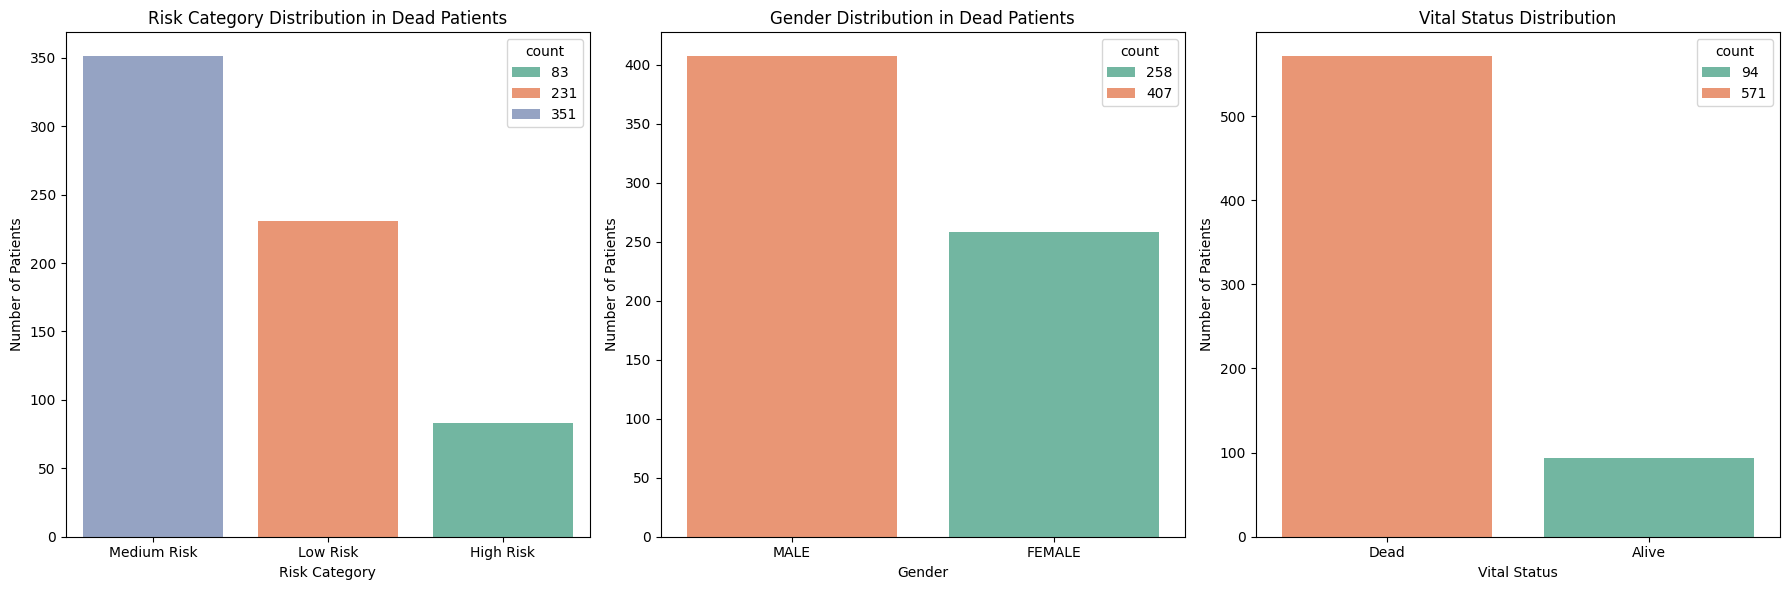

In [68]:
# dead_df = df[df['vital_status'] == 'Dead'].copy()
# alive_df = df[df['vital_status'] == 'Alive'].copy()

# Calculate the 25th and 75th percentiles (first and third quantiles)
q1 = df['days_to_death'].quantile(0.25)
q3 = df['days_to_death'].quantile(0.75)

# Function to classify risk based on days_to_death
def classify_risk(days):
    if days == -1:
        return 'Low Risk'
    if days <= q1:
        return 'High Risk'
    elif days <= q3:
        return 'Medium Risk'
    else:
        return 'Low Risk'

# Apply the classification function to the days_to_death column
df['risk_category'] = df['days_to_death'].apply(classify_risk)



import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for risk_category, gender, and vital_status
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Distribution of patients by risk category
risk_counts = df['risk_category'].value_counts()
sns.barplot(x=risk_counts.index, y=risk_counts.values, hue=risk_counts, palette="Set2", ax=axes[0])
axes[0].set_title('Risk Category Distribution in Dead Patients')
axes[0].set_xlabel('Risk Category')
axes[0].set_ylabel('Number of Patients')

# Plot 2: Distribution of patients by gender
gender_counts = df['gender'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values, hue=gender_counts, palette="Set2", ax=axes[1])
axes[1].set_title('Gender Distribution in Dead Patients')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Number of Patients')

# Plot 3: Distribution of patients by vital status
vital_counts = df['vital_status'].value_counts()
sns.barplot(x=vital_counts.index, y=vital_counts.values, hue=vital_counts, palette="Set2", ax=axes[2])
axes[2].set_title('Vital Status Distribution')
axes[2].set_xlabel('Vital Status')
axes[2].set_ylabel('Number of Patients')

# Adjust layout
plt.tight_layout()
plt.show()


In [69]:
# Drop irrelevant columns
# x = dead_df.drop(['name', 'patient_id', 'days_to_birth', 'days_to_death',
                # 'histological_type', 'bcr_patient_barcode', 'vital_status',
                # 'tumor_tissue_site', 'tumor_status', 'risk_category', 'kurt',
                # 'FractalDim', 'Solidity'], axis=1)
#
x = df[['gender', 'race', 'Centroid1','Centroid2','Centroid3','MajorAxisLength',
			'Eigen1','Eigen2','Eigen3','histo', 'hemorrhage','Entropy',
             'stranded_first', 'Start', 'End', 'Num_Probes', 'Segment_Mean',
             'stranded_second', 'tpm_unstranded', 'fpkm_unstranded', 'fpkm_uq_unstranded']].copy()

# Remove infinite values from x
x.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace infinite values with NaN
x.dropna(inplace=True)  # Drop rows with NaN values

label_encoder_gender = LabelEncoder()
label_encoder_race = LabelEncoder()

x['gender'] = label_encoder_gender.fit_transform(x['gender'])
x['race'] = label_encoder_race.fit_transform(x['race'])


y = df.loc[x.index, 'risk_category']
# Encode the categorical target variable 'y' (risk_category)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Convert to NumPy arrays and ensure the correct data type
# y_encoded = np.array(y_encoded, dtype=np.int32)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=2)

In [70]:
# Retrieve the mapping of encoded values to original values
gender_mapping = dict(enumerate(label_encoder_gender.classes_))
print(gender_mapping)

race_mapping = dict(enumerate(label_encoder_race.classes_))
print(race_mapping)

{0: 'FEMALE', 1: 'MALE'}
{0: 'ASIAN', 1: 'BLACK OR AFRICAN AMERICAN', 2: 'WHITE'}


In [71]:
print("Traning samples:", X_train.shape[0])
print("Traning samples:", X_test.shape[0])

Traning samples: 513
Traning samples: 129


> ### **Building the ANN**

In [72]:
# Initialize the ANN
model = Sequential()

# Add layers to the model
# Input layer (number of nodes = number of features in X)
model.add(Dense(units=32, activation='relu', input_dim=X_train.shape[1]))  # Hidden layer with 32 nodes
model.add(Dense(units=16, activation='relu'))  # Another hidden layer with 16 nodes
model.add(Dense(units=3, activation='softmax'))  # Output layer for 3 risk categories (High, Medium, Low)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 3: Train the model
model_hist = model.fit(X_train, y_train, epochs=30, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.4397 - loss: 1.0775 - val_accuracy: 0.6899 - val_loss: 0.8130
Epoch 2/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6800 - loss: 0.8302 - val_accuracy: 0.7442 - val_loss: 0.7020
Epoch 3/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6903 - loss: 0.7390 - val_accuracy: 0.7984 - val_loss: 0.5951
Epoch 4/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7441 - loss: 0.6541 - val_accuracy: 0.8140 - val_loss: 0.5153
Epoch 5/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7753 - loss: 0.5393 - val_accuracy: 0.8760 - val_loss: 0.4451
Epoch 6/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7966 - loss: 0.4814 - val_accuracy: 0.8760 - val_loss: 0.3666
Epoch 7/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8361 - loss: 0.4212 - val_accuracy: 0.9380 - val_loss: 0.3221
Epoch 8/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8837 - loss: 0.3580 - val_accuracy: 0.9457 - val_loss: 0.2790
Ep

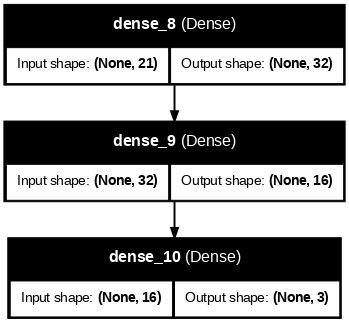

In [73]:
from tensorflow.keras.utils import plot_model
plot_model(model,
           show_shapes = True,
           show_dtype=False,
           show_layer_names = True,
           rankdir = 'TB',
           expand_nested = False,
           dpi = 70)

In [74]:
# Step 4: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0260  
Test Accuracy: 100.00%


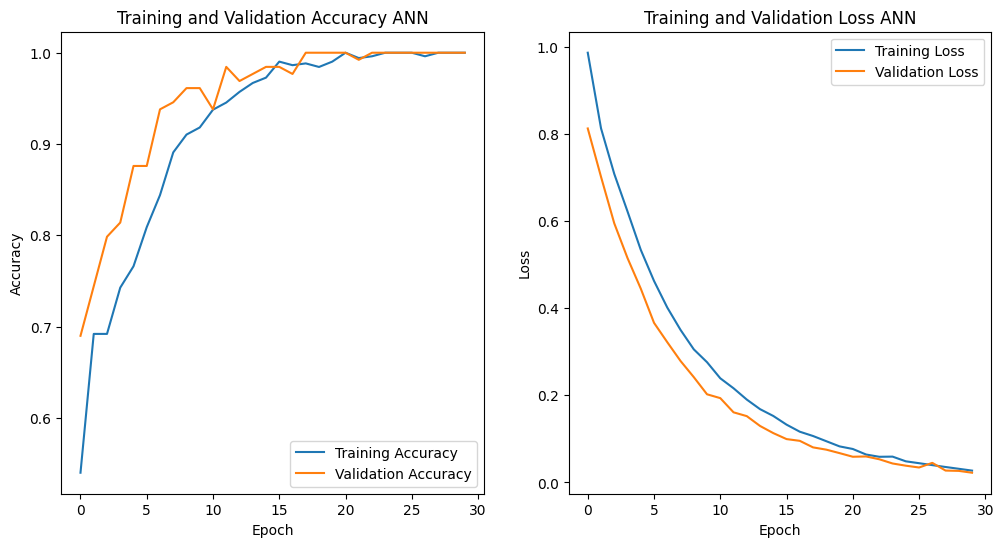

In [75]:
# training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(model_hist.history['accuracy'], label='Training Accuracy')
plt.plot(model_hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy ANN')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# training and validation loss
plt.subplot(1, 2, 2)
plt.plot(model_hist.history['loss'], label='Training Loss')
plt.plot(model_hist.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss ANN')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()